In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

/home/ecbm4040/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import keras as keru
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers as rego

Using TensorFlow backend.


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Task 1 

In [68]:
%matplotlib inline

In [37]:
riris = load_iris()

In [39]:
X = riris.data
y = riris.target

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [41]:
y_train.shape

(112,)

In [42]:
y_train = keru.utils.to_categorical(y_train)
y_test = keru.utils.to_categorical(y_test)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [43]:
y_train.shape

(112, 3)

In [20]:
# From the slides

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV


def make_model(optimizer="adam", hidden_size1=32, hidden_size2=32, reg = 0.01):
    model = Sequential([
    Dense(hidden_size1, input_shape=(4,), kernel_regularizer=rego.l2(reg)),
    Activation('relu'),
    Dense(hidden_size2, kernel_regularizer=rego.l2(reg)),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
    ])
    model.compile(optimizer=optimizer,loss="categorical_crossentropy",   
                  metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)
param_grid = {'hidden_size1': [8,12,32,64],'hidden_size2': [8,12,32,64], 'reg' :[0.001,0.01,0.1,1,10,100] # epochs is fit parameter, not in make_model!
              }
grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)



Epoch 1/1
89/89 [==============================] - 0s 95us/step
Epoch 1/1
89/89 [==============================] - 0s 85us/step
Epoch 1/1
90/90 [==============================] - 0s 86us/step
Epoch 1/1
90/90 [==============================] - 0s 116us/step
Epoch 1/1
90/90 [==============================] - 0s 110us/step
Epoch 1/1
89/89 [==============================] - 0s 104us/step
Epoch 1/1
89/89 [==============================] - 0s 111us/step
Epoch 1/1
90/90 [==============================] - 0s 107us/step
Epoch 1/1
90/90 [==============================] - 0s 125us/step
Epoch 1/1
90/90 [==============================] - 0s 113us/step
Epoch 1/1
89/89 [==============================] - 0s 110us/step
Epoch 1/1
89/89 [==============================] - 0s 123us/step
Epoch 1/1
90/90 [==============================] - 0s 126us/step
Epoch 1/1
90/90 [==============================] - 0s 125us/step
Epoch 1/1
90/90 [==============================] - 0s 119us/step
Epoch 1/1
89/89 [===========

89/89 [==============================] - 0s 124us/step
Epoch 1/1
89/89 [==============================] - 0s 115us/step
Epoch 1/1
90/90 [==============================] - 0s 117us/step
Epoch 1/1
90/90 [==============================] - 0s 134us/step
Epoch 1/1
90/90 [==============================] - 0s 118us/step
Epoch 1/1
89/89 [==============================] - 0s 140us/step
Epoch 1/1
89/89 [==============================] - 0s 139us/step
Epoch 1/1
90/90 [==============================] - 0s 120us/step
Epoch 1/1
90/90 [==============================] - 0s 135us/step
Epoch 1/1
90/90 [==============================] - 0s 121us/step
Epoch 1/1
89/89 [==============================] - 0s 124us/step
Epoch 1/1
89/89 [==============================] - 0s 133us/step
Epoch 1/1
90/90 [==============================] - 0s 126us/step
Epoch 1/1
90/90 [==============================] - 0s 143us/step
Epoch 1/1
90/90 [==============================] - 0s 122us/step
Epoch 1/1
89/89 [==================

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f764f8b47b8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_size1': [8, 12, 32, 64], 'reg': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
grid.score(X_test, y_test)

38/38 [==============================] - 2s 57ms/step


0.31578947446848216

In [43]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_reg", "param_hidden_size1"],
                values=['mean_train_score', "mean_test_score"])




/home/ecbm4040/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ecbm4040/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ecbm4040/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/ecbm4040/.local/lib/python3.5/

mean_test_score  mean_train_score
param_reg param_hidden_size1                                   
0.001     8                          0.303571          0.283745
          12                         0.383929          0.404395
          32                         0.366071          0.386542
          64                         0.348214          0.281323
0.010     8                          0.339286          0.328015
          12                         0.294643          0.343770
          32                         0.401786          0.330387
          64                         0.410714          0.410437
0.100     8                          0.437500          0.413233
          12                         0.455357          0.404544
          32                         0.383929          0.316879
          64                         0.232143          0.278602
1.000     8                          0.383929          0.303571
          12                         0.410714          0.399326
          32                         0.366071          0.408739
          64                         0.437500          0.336879
10.000    8                          0.437500          0.381348
          12                         0.366071          0.332709
          32                         0.196429          0.297278
          64                         0.455357          0.379101
100.000   8                          0.410714          0.355181
          12                         0.508929          0.491411
          32                         0.241071          0.278552
          64                         0.276786          0.340749

# Task 2

In [45]:
from keras.datasets import mnist

In [46]:
data = mnist

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train_images = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test_images = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
y_train = keru.utils.to_categorical(y_train, num_classes)
y_test = keru.utils.to_categorical(y_test, num_classes)



In [49]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [50]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train,
                      batch_size=128, epochs=20, verbose=1, validation_split=.1)
cnn.evaluate(X_test_images, y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 93us/step - loss: 0.9779 - acc: 0.8847 - val_loss: 0.0927 - val_acc: 0.9760
Epoch 2/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.0786 - acc: 0.9760 - val_loss: 0.0753 - val_acc: 0.9792
Epoch 3/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0554 - val_acc: 0.9855
Epoch 4/20
54000/54000 [==============================] - 4s 77us/step - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0594 - val_acc: 0.9838
Epoch 5/20
54000/54000 [==============================] - 4s 75us/step - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0561 - val_acc: 0.9845
Epoch 6/20
54000/54000 [==============================] - 4s 75us/step - loss: 0.0270 - acc: 0.9911 - val_loss: 0.0566 - val_acc: 0.9860
Epoch 7/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.0234 - acc: 0.9923 - val_loss: 0.0552 - val_acc:

[0.07738667782023835, 0.9852]

In [11]:
from keras.layers import Dropout

In [13]:
cnn_drop = Sequential()
cnn_drop.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_drop.add(MaxPooling2D(pool_size=(2, 2)))
cnn_drop.add(Dropout(0.5))
cnn_drop.add(Conv2D(32, (3, 3), activation='relu'))
cnn_drop.add(MaxPooling2D(pool_size=(2, 2)))
cnn_drop.add(Flatten())
cnn_drop.add(Dense(64, activation='relu'))
cnn_drop.add(Dense(num_classes, activation='softmax'))
cnn_drop.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn_drop.fit(X_train_images, y_train,
                      batch_size=128, epochs=20, verbose=1, validation_split=.1)
cnn_drop.evaluate(X_test_images, y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 81us/step - loss: 4.9478 - acc: 0.6614 - val_loss: 0.3594 - val_acc: 0.9152
Epoch 2/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.2650 - acc: 0.9293 - val_loss: 0.0926 - val_acc: 0.9698
Epoch 3/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.1375 - acc: 0.9592 - val_loss: 0.0689 - val_acc: 0.9787
Epoch 4/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.1042 - acc: 0.9686 - val_loss: 0.0579 - val_acc: 0.9828
Epoch 5/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.0878 - acc: 0.9735 - val_loss: 0.0520 - val_acc: 0.9863
Epoch 6/20
54000/54000 [==============================] - 4s 75us/step - loss: 0.0744 - acc: 0.9773 - val_loss: 0.0558 - val_acc: 0.9832
Epoch 7/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.0647 - acc: 0.9803 - val_loss: 0.0418 - val_acc:

[0.036118852441035236, 0.9893]

# Task 3

In [168]:
import scipy.io as sio

In [169]:
train = sio.loadmat("train_32x32.mat")

In [170]:
test = sio.loadmat("test_32x32.mat")

In [171]:
train.keys()

dict_keys(['X', '__version__', '__globals__', 'y', '__header__'])

In [172]:
X_train = train["X"]
X_test = test["X"]

In [173]:
y_train = train["y"]
y_test = test["y"]

In [174]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [175]:
X_train.shape

(32, 32, 3, 73257)

In [176]:
y_train = y_train.reshape(73257,)
y_test = y_test.reshape(26032,)


In [177]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [178]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout


In [179]:
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 32, 32
# the data, shuffled and split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train  =  np.transpose(train["X"], (3, 0,1, 2))
X_test  =  np.transpose(test["X"], (3, 0,1, 2))
input_shape = (img_rows, img_cols, 3)
#y_train = keru.utils.to_categorical(y_train)
#y_test = keru.utils.to_categorical(y_test)



In [182]:
X_train.shape

(73257, 32, 32, 3)

In [183]:
input_shape

(32, 32, 3)

##### Without Batch Norm

In [187]:
from keras.layers import BatchNormalization
num_class = 10
cnn_small_bn = Sequential()
cnn_small_bn.add(Conv2D(8, kernel_size=(3, 3), padding="valid",
                 input_shape=input_shape))
cnn_small_bn.add(Activation("relu"))
#cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Conv2D(16, (3, 3), padding="valid"))
cnn_small_bn.add(Activation("relu"))
#cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Flatten())
cnn_small_bn.add(Dense(64, activation='relu'))
cnn_small_bn.add(Dense(num_classes, activation='softmax'))
cnn_small_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_bn = cnn_small_bn.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=.1)
cnn_small_bn.evaluate(X_test, y_test)


Train on 65931 samples, validate on 7326 samples
Epoch 1/30
65931/65931 [==============================] - 5s 81us/step - loss: 1.8663 - acc: 0.4376 - val_loss: 1.0944 - val_acc: 0.6560
Epoch 2/30
65931/65931 [==============================] - 5s 74us/step - loss: 0.8739 - acc: 0.7425 - val_loss: 0.7394 - val_acc: 0.7841
Epoch 3/30
65931/65931 [==============================] - 5s 74us/step - loss: 0.6869 - acc: 0.7998 - val_loss: 0.6552 - val_acc: 0.8163
Epoch 4/30
65931/65931 [==============================] - 5s 75us/step - loss: 0.5960 - acc: 0.8237 - val_loss: 0.5865 - val_acc: 0.8311
Epoch 5/30
65931/65931 [==============================] - 5s 75us/step - loss: 0.5313 - acc: 0.8441 - val_loss: 0.6438 - val_acc: 0.8034
Epoch 6/30
65931/65931 [==============================] - 5s 75us/step - loss: 0.4993 - acc: 0.8514 - val_loss: 0.6146 - val_acc: 0.8246
Epoch 7/30
65931/65931 [==============================] - 5s 75us/step - loss: 0.4647 - acc: 0.8619 - val_loss: 0.5662 - val_acc:

[0.7752083152299032, 0.8533343577135832]

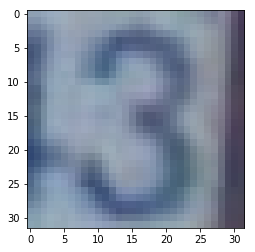

In [69]:
from matplotlib import pyplot as plt
plt.imshow(X_train[69,:,:,:], interpolation='nearest')
plt.show()

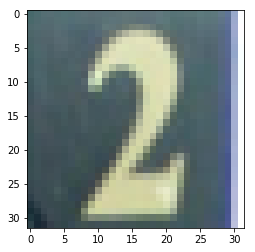

In [70]:
plt.imshow(X_train[43,:,:,:], interpolation='nearest')


#### With Batch Norm

In [121]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

regularizer = l2()

num_class = 10
cnn_small_bn = Sequential()
cnn_small_bn.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=input_shape, kernel_regularizer=regularizer))
cnn_small_bn.add(Activation("relu"))


cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Conv2D(32, (5, 5), padding="same", kernel_regularizer=regularizer))
cnn_small_bn.add(Activation("relu"))


#cnn_small_bn.add(BatchNormalization())

cnn_small_bn.add(BatchNormalization())
cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Conv2D(32, (5, 5), padding="same", kernel_regularizer=regularizer))
cnn_small_bn.add(Activation("relu"))


cnn_small_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_small_bn.add(Flatten())
cnn_small_bn.add(Dense(512, activation='relu'))
cnn_small_bn.add(Dense(num_classes, activation='softmax'))
cnn_small_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_bn = cnn_small_bn.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=.1)
cnn_small_bn.evaluate(X_test, y_test)


Train on 65931 samples, validate on 7326 samples
Epoch 1/20
65931/65931 [==============================] - 12s 182us/step - loss: 1.1094 - acc: 0.7648 - val_loss: 0.8264 - val_acc: 0.8170
Epoch 2/20
65931/65931 [==============================] - 10s 153us/step - loss: 0.5850 - acc: 0.8805 - val_loss: 0.7657 - val_acc: 0.8303
Epoch 3/20
65931/65931 [==============================] - 10s 147us/step - loss: 0.4942 - acc: 0.8964 - val_loss: 0.6045 - val_acc: 0.8661
Epoch 4/20
65931/65931 [==============================] - 10s 147us/step - loss: 0.4370 - acc: 0.9082 - val_loss: 0.4651 - val_acc: 0.9019
Epoch 5/20
65931/65931 [==============================] - 10s 148us/step - loss: 0.4101 - acc: 0.9155 - val_loss: 0.4746 - val_acc: 0.8934
Epoch 6/20
65931/65931 [==============================] - 10s 146us/step - loss: 0.3873 - acc: 0.9213 - val_loss: 0.4355 - val_acc: 0.9115
Epoch 7/20
65931/65931 [==============================] - 10s 146us/step - loss: 0.3764 - acc: 0.9240 - val_loss: 0.4

[0.5498426361965415, 0.894860172095882]

### Test Accuracy with Batch Norm: 89.5% without Batch Norm: 85.33%


# Task 4

In [96]:
train_lab = pd.read_csv("annotations/list.txt", sep=" ", skiprows=[0,1,2,3,4,5],names = ["Name", "class","breed","sdf"])
#test_lab = pd.read_csv("annotations/test.txt", sep=" ", names = ["Name", "class","breed","sdf"])

In [16]:
y_train = train_lab['class']
#y_test = test_lab['class']

In [17]:
len(y_train)

7349

In [18]:
y = np.array(y_train)

In [19]:
y.shape

(7349,)

In [20]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37])

In [22]:
from keras.preprocessing import image

In [23]:
ert3 = image.load_img("images/Abyssinian_101.jpg", target_size=(224,224))

zxcbdf = image.img_to_array(ert3)

In [24]:
zxcbdf.shape

(224, 224, 3)

In [25]:
X_data = zxcbdf

In [119]:
train_lab.Name = train_lab.Name.str.replace('\s+', '_')

In [120]:
names = train_lab["Name"]

In [128]:
nam0 = names.tolist()

In [122]:
import glob
import re

In [ ]:
#X_data = np.array([1,2,3])
y_lab = []
X_data = []

files = glob.glob("images/*.jpg")
for myFile in files:
    result = re.search('images/(.*).jpg', myFile)
    file_name = result.group(1)
    file_name = "".join(file_name.split())
    #print(file_name)
    
    if(file_name not in nam0):
        continue
    
    
    #image = cv2.imread (myFile)
    
    ert3 = image.load_img(myFile, target_size=(224,224))

    zxcbdf1 = image.img_to_array(ert3)
    
    #train_lab.loc[train_lab['Name'] == file_name, 'sdf'] = image
    #np.append(X_data, zxcbdf1, axis = 0)
    X_data.append(zxcbdf1)
    #train_lab.loc[train_lab['Name'] == file_name, "breed"] = 
    a = train_lab.loc[train_lab['Name'] == file_name, "class"].iloc[0]
    y_lab.append(a)
    #X_data.append(zxcbdf1)
    #print(a)

    #print(image.shape)

    
        
    
    
        


In [134]:
y_fin = np.array(y_lab)

In [136]:
y = y_fin

In [156]:
len(y_lab)

7349

In [150]:
X = np.array([img for img in X_data])

In [151]:
X.shape

(7349, 224, 224, 3)

In [17]:
X_train = X

In [20]:
y_fin = np.array(y_lab)

In [152]:
np.save("y.npy", y)

In [153]:
np.save("X.npy", X)

In [154]:
X.shape

(7349, 224, 224, 3)

In [155]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

#model = VGG16(weights='imagenet', include_top=False)

#img_path = 'elephant.jpg'
#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#from keras.preprocessing import image
#X = np.array([image.img_to_array(img) for img in images_carpet + images_ball])
# load VGG16
model = VGG16(include_top=False, weights='imagenet')
# preprocessing for VGG16
from keras.applications.vgg16 import preprocess_input
X_pre = preprocess_input(X)
features = model.predict(X_pre)

#features = model.predict()

In [158]:
print(X.shape)
print(features.shape)
features_ = features.reshape(7349, -1)



(7349, 224, 224, 3)
(7349, 7, 7, 512)


In [159]:
feat_fin = features_

In [160]:
feat_fin.shape

(7349, 25088)

In [ ]:
np.save("features.npy", feat_fin)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat_fin, y, stratify=y)


In [162]:
from sklearn.linear_model import LogisticRegressionCV

In [164]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [166]:
svc.score(X_test, y_test)

0.8656147986942329

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svc.predict(X_test))

array([[40,  0,  0, ...,  0,  0,  0],
       [ 0, 39,  2, ...,  1,  0,  0],
       [ 0,  2, 31, ...,  6,  1,  0],
       ...,
       [ 0,  2,  5, ..., 33,  0,  0],
       [ 0,  0,  0, ...,  0, 48,  0],
       [ 0,  0,  0, ...,  0,  1, 49]])

### Transfer learning using VGG16 test accuracy: 86.56%